In [15]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import pandas as pd
import time


# 다운로드 폴더 경로 설정
download_dir = "/Users/jaesolshin/Library/CloudStorage/GoogleDrive-ysys143@gmail.com/내 드라이브/2024-2/Google ML Bootcamp2024/"

# Chrome 옵션 설정
chrome_options = Options()
#chrome_options.add_argument('--headless')  # 브라우저 창을 띄우지 않음
chrome_options.add_experimental_option('prefs', {
    "download.default_directory": download_dir,  # 다운로드 경로 설정
})

# 크롬 드라이버 서비스 설정 및 실행
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options = chrome_options)

# URL 열기
url = 'https://www.youtube.com/'
driver.get(url)

# 대기 설정
driver.implicitly_wait(5)  # 최대 10초 대기
driver.find_element(By.CSS_SELECTOR, 'input#search').send_keys('르세라핌')  # 원하는 키워드로 변경
driver.implicitly_wait(1) 
driver.find_element(By.CSS_SELECTOR, 'button#search-icon-legacy').click()  # 검색 버튼 클릭
driver.implicitly_wait(1) 
driver.find_element(By.CSS_SELECTOR, 'button#search-icon-legacy').click()  # 검색 버튼 클릭
driver.implicitly_wait(1) 
driver.find_elements(By.CSS_SELECTOR, '#thumbnail > yt-image > img:nth-child(1)')[0].click()

# 작업 후 드라이버 종료
#driver.quit()

In [26]:
for i in range(100):
    driver.execute_script("window.scrollBy(0, 10000);") # 1000픽셀 아래로 스크롤
    time.sleep(1)


In [37]:
# 댓글과 작성자 ID 요소 가져오기
comment_elements = driver.find_elements(By.CSS_SELECTOR, "#content #content-text")
author_elements = driver.find_elements(By.CSS_SELECTOR, "#header-author #author-text")

# 댓글과 작성자 ID 추출
comments_data = []
for comment, author in zip(comment_elements, author_elements):
    comment_text = comment.text
    author_name = author.text.strip()
    comments_data.append({"author": author_name, "comment": comment_text})

# 수집한 댓글과 ID 출력
for i, data in enumerate(comments_data):
    print(f"작성자: {data['author']}\n")
    print(f"댓글 {i + 1}: {data['comment']}")

댓글 1: can we talk about how AWESOME it is to have the juicy couture crew in the mv and also have them credited? this is house vogue ballroom, this is black culture. i'm so proud! my fimmies!
작성자: @stank0nia

댓글 2: I’m sure at the time they said, ”All the girls are girling girling” & “Act like an angel and dress like crazy” will be their iconic part.
작성자: @Hannainyourheart

댓글 3: THE VOGUEING WAS LITERALLY CRAZY THEY ATEEEE
작성자: @hongteezer

댓글 4: I CANT STOP WATCHING THIS MV HELP MEE 
작성자: @en-xo-hypen

댓글 5: OMG RAPPER YUNJIN?! RAPPER CHAEWON?? RAPPER SAKURA?? RAPPER
KAZUHA?? RAPPER EUNCHAE?? IM IN LOVE OMGGG
작성자: @123rawr8

댓글 6: Two weeks on the HOT 100 BILLBOARD this is Otaku Bestie
작성자: @aydozEKpop

댓글 7: I just wanna say, a lot of people were comparing their concept photos, teasers and snippets - just their concept as a whole to Red Velvet, but this song was sooo Le Sserafim style. Like they did the "weird" concept and ATE it up in THEIR own way. They did amazing!!
작성자: @sabii_ii

In [55]:
comments_df = pd.DataFrame(comments_data)
comments_df 

,author,comment
0,@stank0nia,can we talk about how AWESOME it is to have th...
1,@Hannainyourheart,"I’m sure at the time they said, ”All the girls..."
2,@hongteezer,THE VOGUEING WAS LITERALLY CRAZY THEY ATEEEE
3,@en-xo-hypen,I CANT STOP WATCHING THIS MV HELP MEE
4,@123rawr8,OMG RAPPER YUNJIN?! RAPPER CHAEWON?? RAPPER SA...
...,...,...
935,@trucquynh4015,"2k....,21"
936,@ilovechai2520,All the mothers are mothering
937,@baobao-uh6it,70m go go piona
938,@ken78699,Back in the days️\n米奇美 米奇几 莫忒动me\n躲衣裳内 各林马佩\n锅...


In [56]:
driver.quit()

In [58]:
#!pip install langdetect
from langdetect import detect, detect_langs, LangDetectException

# 언어 감지 함수 정의
def detectLanguage(text):
    try:
        # 텍스트가 비어있거나 너무 짧은 경우 None 반환
        if not text or len(text.strip()) == 0:
            return "unknown"
        return detect(text)
    except LangDetectException:
        return "unknown"
    
comments_df['lang'] = comments_df['comment'].apply(detectLanguage)
    
comments_df

,author,comment,lang
0,@stank0nia,can we talk about how AWESOME it is to have th...,en
1,@Hannainyourheart,"I’m sure at the time they said, ”All the girls...",en
2,@hongteezer,THE VOGUEING WAS LITERALLY CRAZY THEY ATEEEE,vi
3,@en-xo-hypen,I CANT STOP WATCHING THIS MV HELP MEE,en
4,@123rawr8,OMG RAPPER YUNJIN?! RAPPER CHAEWON?? RAPPER SA...,en
...,...,...,...
935,@trucquynh4015,"2k....,21",cs
936,@ilovechai2520,All the mothers are mothering,en
937,@baobao-uh6it,70m go go piona,pl
938,@ken78699,Back in the days️\n米奇美 米奇几 莫忒动me\n躲衣裳内 各林马佩\n锅...,en


In [50]:
comments_df['lang'].value_counts()

lang
en         542
ja          54
ko          51
de          48
so          25
sw          18
unknown     16
fr          16
es          15
pl          14
id          13
cy          12
tl          11
pt          11
no          10
af           8
vi           8
it           8
hr           8
ca           7
fi           6
nl           5
et           4
ro           4
sl           4
sk           3
tr           3
ru           3
ar           2
lv           2
cs           2
da           1
hu           1
zh-cn        1
sq           1
uk           1
fa           1
th           1
Name: count, dtype: int64

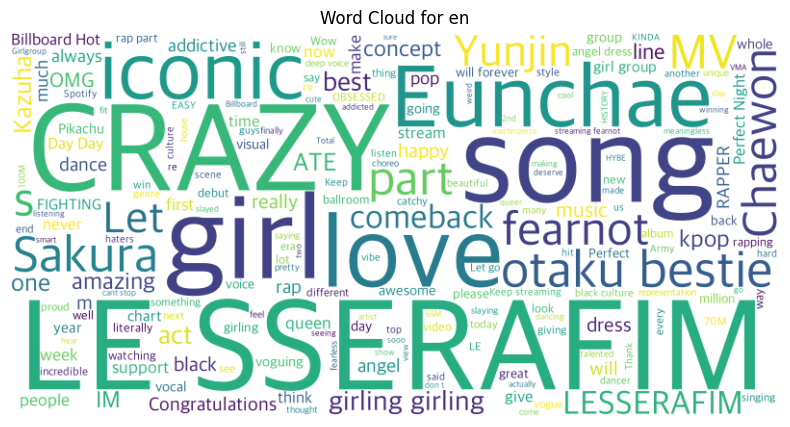

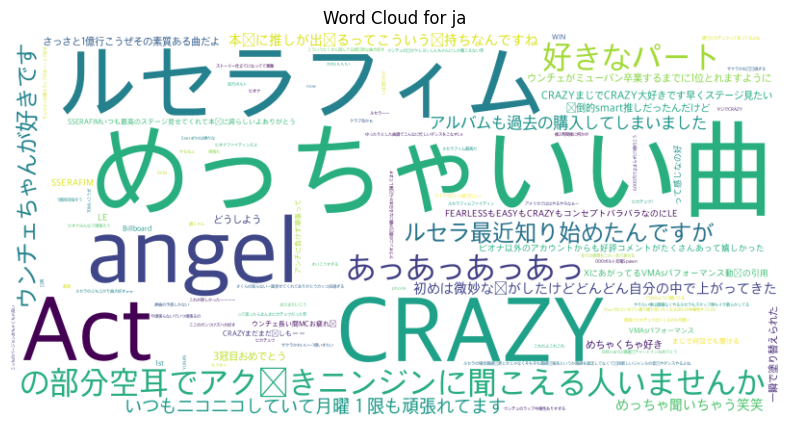

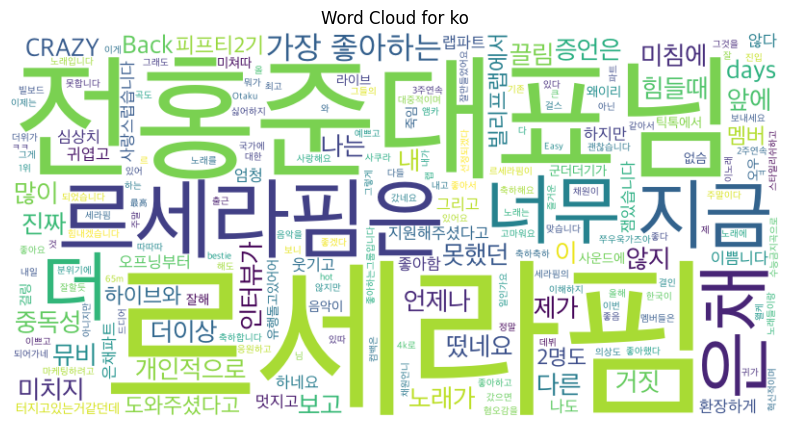

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 상위 3개의 언어별로 댓글을 그룹화
top_langs = comments_df['lang'].value_counts().nlargest(3).index
top_langs_comments = comments_df[comments_df['lang'].isin(top_langs)]

font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"

# 각 언어별로 워드 클라우드를 생성하는 함수
def generate_wordcloud(lang, comments):
    text = " ".join(comment for comment in comments)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text)

    # 워드 클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {lang}")
    plt.show()

# 각 상위 언어별 워드 클라우드 생성
for lang in top_langs:
    lang_comments = top_langs_comments[top_langs_comments['lang'] == lang]['comment']
    generate_wordcloud(lang, lang_comments)

In [60]:
top_langs_comments

,author,comment,lang
0,@stank0nia,can we talk about how AWESOME it is to have th...,en
1,@Hannainyourheart,"I’m sure at the time they said, ”All the girls...",en
3,@en-xo-hypen,I CANT STOP WATCHING THIS MV HELP MEE,en
4,@123rawr8,OMG RAPPER YUNJIN?! RAPPER CHAEWON?? RAPPER SA...,en
5,@aydozEKpop,Two weeks on the HOT 100 BILLBOARD this is Ota...,en
...,...,...,...
932,@kinoko8761,THIS IS LITERALLY DTI'S POSES INSPO AND THEYRE...,en
933,@Sun_p_Moon,"ピカチュウ, 百万ボルト",ja
934,@Im_Julie669,HAVE YALL NOT NOTICED THAT THEY TEASE THEIR NE...,en
936,@ilovechai2520,All the mothers are mothering,en


--- OpenAI API를 통한 감정분석 ---

In [53]:
#Use 3.12.4
import openai
import os
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, AIMessage, SystemMessage
from langchain.document_loaders import DirectoryLoader, TextLoader
from langchain.docstore.document import Document
import tiktoken

key_path = '/Users/jaesolshin/key/openai_key.txt'
os.environ["OPENAI_API_KEY"] = open(key_path, 'r', encoding='utf-8').read()
openai.api_key = os.environ["OPENAI_API_KEY"] 

TypeError: ForwardRef._evaluate() missing 1 required keyword-only argument: 'recursive_guard'